# HEUR: K-armed bandit problem 

## Introduction 

In probability theory and machine learning, multi-armed bandit problem reffers to a model which can be seen as a set of real distributions $\{F_1,\dots,F_K\}$, each distribution being associated with the rewards delivered by one of the $K\in\N^+$ levers. Let $\mu_1,\dots,\mu_K$ be the mean values associated with these reward distributions. The gambler iteratively plays one lever per round and observes the associated reward. The objective is to maximize the sum of the collected rewards. Several strategies or algorithms have been proposed as a solution to this problem in the last two decades. In this project, we will focus on the comparison of basic strategies in order to find (heuristically) best option.

We define
* $\mathtt{episode}$ as the number of games,
* horizon $\mathtt{iters}$ as the number of rounds to be played in each game,
* maximum mean reward as $\mu^* = \mathtt{max}\{\mu_1,\mu_2\,... \mu_K\},$
* regret $\rho$ after $T$ rounds played as $\rho(T) = T\mu^* - \sum_{t=1}^{T}r_t,$ where $r_t$ is the reward in round $t$ ($\rho$ is also a random variable),
* expected regret as $\mathbb{E}[\rho(T)]$,
* letter $\mathtt{k}$ for the levers (arms).

"One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but, as stated before, each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the explore-exploit dilemma." - *Christian Hubbs, TowardDataScience [2]*

In [1]:
from IPython.display import Video
Video("multi_armed_bandit.webm", width=700)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

## Startegies

- to be done - 

For the purpose of following vizualisation, lets set:

In [3]:
# Number of arms
k = 10
# Number of rounds to be played within each game
iters = 500
# Number of games to be played
episodes = 1000
# Mean values of arms ('random', 'sequence', 'sequence2', list, array)
mu_input = 'sequence'

### $\varepsilon$-greedy strategy

In [4]:
from bandits import eps_greedy_bandit

The $\varepsilon$-greedy strategy is one of the most basic option for dealing with multi armed bandit problem and is widely used because of its simplicity. It is based on finding the balance between exploration and exploitation action within the algorithm. At each round the algorithm selects
the arm with the highest empirical mean with probability $1 − \varepsilon$, and selects a random arm with probability $\varepsilon$. In other word, the probability $p_i$ of choosing the $i$-th arm in the next round $t+1$ is $$p_i(t+1)=\begin{cases}&1-\varepsilon + \frac{\varepsilon}{k}\quad\text{    if }i=\text{argmax}_{j}\hat{\mu_j}(t),\\&\frac{\varepsilon}{k}\quad\text{otherwise},\end{cases}$$
where $k$ is the number of arms and $\hat{\mu_j}(t)$ is the empirical mean of $j$-th arm after $t$ turns.

Choosing $\varepsilon=0$ leads to an 0- greedy algorithm, in which is in the first round randomly selected an arm that is being pulled for the rest of the game. 

Settings for the experiment:

In [5]:
# Choose strategies
eps0=0
eps1=0.05
eps2=0.10
eps3=0.20 

In [6]:
# Initialization
eps_0_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_2_rewards = np.zeros(iters)
eps_3_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_1_selection = np.zeros(k)
eps_2_selection = np.zeros(k)
eps_3_selection = np.zeros(k)
eps_0_rewards_cum = np.zeros(iters)
eps_1_rewards_cum = np.zeros(iters)
eps_2_rewards_cum = np.zeros(iters)
eps_3_rewards_cum = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_greedy_bandit(k, eps0, iters, mu=mu_input)
    eps_1 = eps_greedy_bandit(k, eps1, iters, eps_0.mu.copy())
    eps_2 = eps_greedy_bandit(k, eps2, iters, eps_0.mu.copy())
    eps_3 = eps_greedy_bandit(k, eps3, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_1.run()
    eps_2.run()
    eps_3.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    eps_2_rewards = eps_2_rewards + (
        eps_2.reward - eps_2_rewards) / (i + 1)
    eps_3_rewards = eps_3_rewards + (
        eps_3.reward - eps_3_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    eps_2_selection = eps_2_selection + (
        eps_2.k_n - eps_2_selection) / (i + 1)
    eps_3_selection = eps_3_selection + (
        eps_3.k_n - eps_3_selection) / (i + 1)

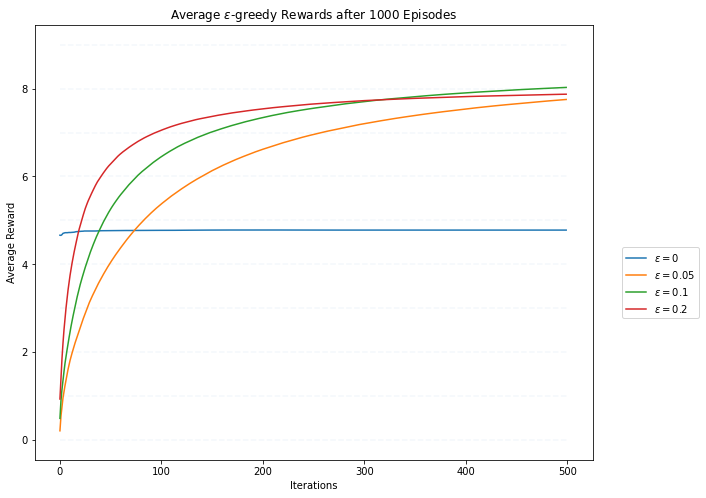

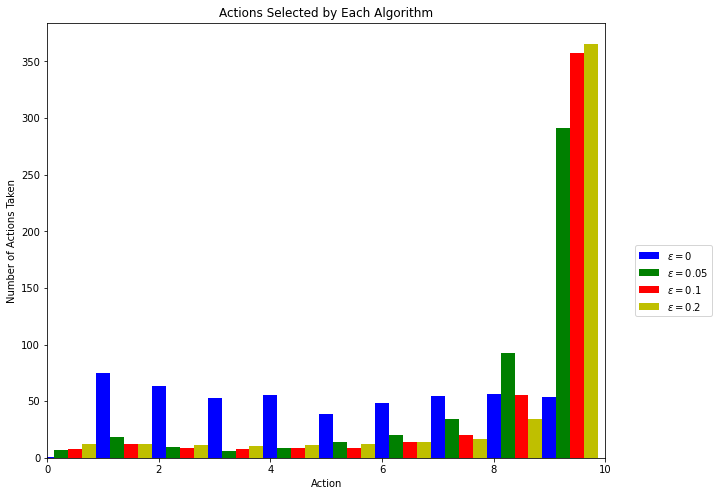

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
eps=0,0.2054,14.9286,12.7668,10.4992,11.1000,7.8000,9.6000,11.0000,11.3000,10.8000
eps=0.05,1.3648,3.6236,1.8240,1.2578,1.6492,2.7060,4.0254,6.8612,18.4784,58.2096
eps=0.1,1.6412,2.3796,1.6426,1.4926,1.6982,1.8056,2.7642,3.9612,11.1592,71.4556
eps=0.2,2.3782,2.4712,2.2528,2.1618,2.2670,2.4446,2.7352,3.3240,6.8256,73.1396


In [7]:
# Plot average rewards    
plt.figure(figsize=(10,8))
plt.plot(eps_0_rewards, label="$\epsilon=$"+str(eps0))
plt.plot(eps_1_rewards, label="$\epsilon=$"+str(eps1))
plt.plot(eps_2_rewards, label="$\epsilon=$"+str(eps2))
plt.plot(eps_3_rewards, label="$\epsilon=$"+str(eps3))
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.05,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon$-greedy Rewards after " + 
     str(episodes) + " Episodes")
plt.show()

# Counts of actions
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(10,8))
plt.bar(bins, eps_0_selection, 
        width = 0.25, color='b', 
        label="$\epsilon=$"+str(eps0))
plt.bar(bins+0.25, eps_1_selection,
        width=0.25, color='g', 
        label="$\epsilon=$"+str(eps1))
plt.bar(bins+0.50, eps_2_selection, 
        width=0.25, color='r',
        label="$\epsilon=$"+str(eps2))
plt.bar(bins+0.75, eps_3_selection, 
        width=0.25, color='y',
        label="$\epsilon=$"+str(eps3))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_1_selection,
                   eps_2_selection, eps_3_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['eps='+str(eps0), 
    'eps='+str(eps1), 'eps='+str(eps2), 'eps='+str(eps3)],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

### $\varepsilon$-decay strategy

In [8]:
from bandits import eps_decay_bandit

The $\varepsilon$-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. The $\varepsilon$-decay, also known as $\varepsilon$-decreasing strategy, is one of many modifications of $\varepsilon$-greedy strategies. This strategy reduces the probability of exploration with every step, turning constant $\varepsilon$ into the function of number of rounds played $\varepsilon(t)$. We define $$\varepsilon(t)=\frac{1}{1+\beta t},$$ where $\beta<1$ is used for scaling. 

In [9]:
eps_decay_rewards = np.zeros(iters)
eps_rewards = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters, 1/k)
    eps_1 = eps_greedy_bandit(k, 0.1, iters, eps_decay.mu.copy())
    
    # Run experiments
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)

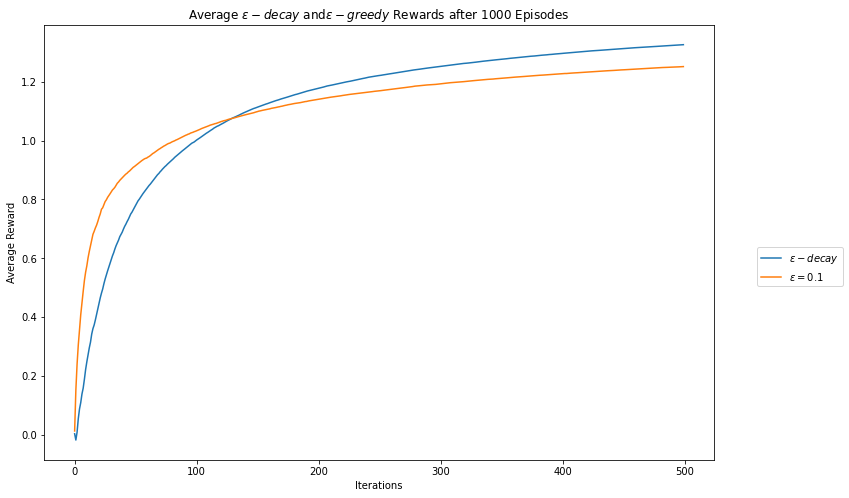

In [10]:
# Average rewards
plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and" + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()

### Optimistic Initial Value strategy

If we leave the $\varepsilon$ strategies for a while, the Optimistic Initial value strategy offers almost oposite approach to finding optimal strategy. The difference lies within the absence of adding random noice in order to find best action. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

Because of this definition, we can this strategy prepare from 0-greedy algorithm.

In [11]:
# Initialization
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Select initial values
oiv_init = np.repeat(5., k)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    oiv_bandit = eps_greedy_bandit(k, 0, iters)
    oiv_bandit.k_reward = oiv_init.copy()
    oiv_bandit.k_n = np.ones(k)
    eps_decay = eps_decay_bandit(k, iters,1/k, oiv_bandit.mu.copy())
    eps_1 = eps_greedy_bandit(k, 0.1, iters, oiv_bandit.mu.copy())
    
    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    oiv_rewards = oiv_rewards + (
        oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)


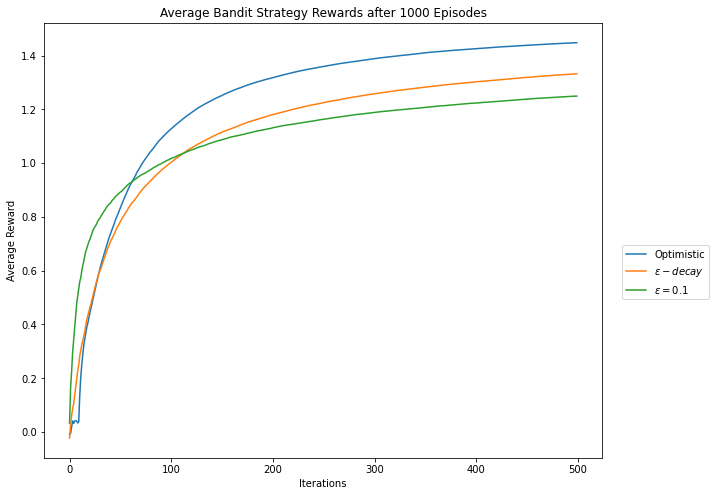

In [12]:
plt.figure(figsize=(10,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + 
    str(episodes) + " Episodes")
plt.show()

### SoftMax strategy

In [13]:
from bandits import softmax_bandit, eps_greedy_bandit

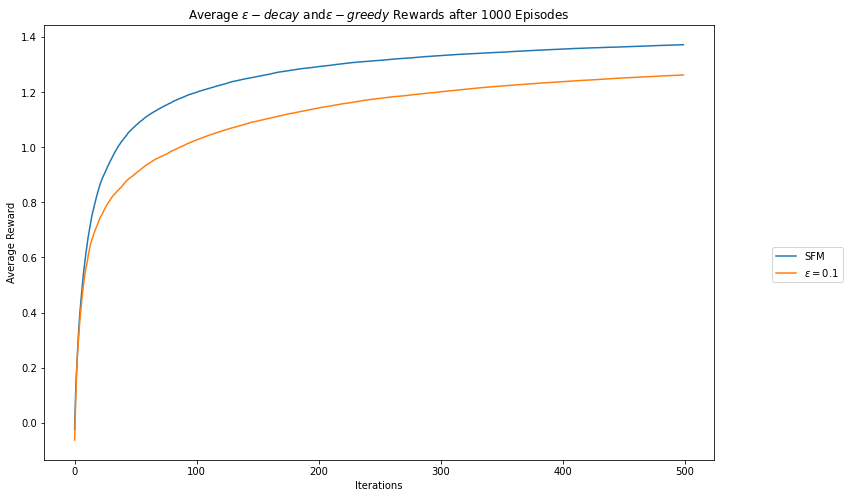

In [14]:
sfm_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    sfm = softmax_bandit(k, iters, T=0.2)
    eps_1 = eps_greedy_bandit(k, 0.1, iters, sfm.mu.copy())
    
    # Run experiments
    sfm.run()
    eps_1.run()
    
    # Update long-term averages
    sfm_rewards = sfm_rewards + (
        sfm.reward - sfm_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(sfm_rewards, label="SFM")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and" + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()